解决面试编程题的有几种常用思路。首先一般考虑“万能的”暴力穷举（递归、回溯），如求n个数的全排列或八皇后（N皇后问题）。但因为穷举时间复杂度通常过高，所以需要考虑更好的方法，如分治法（通过分而治之，然后归并），以及空间换时间（如活用哈希表）。

此外，选择合适的数据结构可以显著提升效率，如寻找最小的k个数中，用堆代替数组。
再有，如果题目允许排序，则可以考虑排序。

比如，寻找和为定值的两个数中，先排序，然后用前后两个指针往中间扫。而如果如果已经排好序了（如杨氏矩阵查找中），则想想有无必要二分。但是，如果题目不允许排序呢？这个时候，我们可以考虑不改变数列顺序的贪心算法（如最小生成树Prim、Kruskal及最短路dijkstra），或动态规划（如 01背包问题，每一步都在决策）。

最后，注意细节处理，不要忽略边界条件，如字符串转换成整数。


## 1. 输入n个整数，输出其中最小的k个。


输入n个整数，输出其中最小的k个。



#### 解法1： 完整排序（快排）

In [5]:
def quick_sort(li):
    
    if len(li)<=1: return li
    middle = li.pop()
    l, r = [], []
    for i in li:
        if i>=middle: r.append(i)
        else: l.append(i)
    return quick_sort(l)+[middle]+quick_sort(r)
    
    
print(quick_sort([1,-1,4,5,6,7,123,324,4534,123]))

[-1, 1, 4, 5, 6, 7, 123, 123, 324, 4534]


我想你可能会第一时间想到快速排序（我们知道，快速排序平均所费时间为n*logn），然后再遍历序列中前k个元素输出即可。

因此，总的时间复杂度：O（n * log n)+O(k)=O（n * log n）。

#### 解法2

咱们再进一步想想，题目没有要求最小的k个数有序，也没要求最后n-k个数有序。既然如此，就没有必要对所有元素进行排序。

这时，咱们想到了用选择或交换排序，即：

    1、遍历n个数，把最先遍历到的k个数存入到大小为k的数组中，假设它们即是最小的k个数；
    2、对这k个数，利用选择或交换排序找到这k个元素中的最大值kmax（找最大值需要遍历这k个数，时间复杂度为O（k））；
    3、继续遍历剩余n-k个数。假设每一次遍历到的新的元素的值为x，把x与kmax比较：如果x < kmax ，用x替换kmax，并回到第二步重新找出k个元素的数组中最大元素kmax‘；如果x >= kmax，则继续遍历不更新数组。
    每次遍历，更新或不更新数组的所用的时间为O（k）或O（0）。故整趟下来，时间复杂度为n*O（k）=O（n*k）。

In [27]:
def Slection_sort(input_list, k):
    
    for i in range(k-1):
        index = None
        for j in range(i, len(input_list)):
            if index == None: index = j
            if input_list[j]<input_list[index]:
                index = j
        input_list[i], input_list[index] = \
        input_list[index],input_list[i]
            
    return input_list[:k]
    
list = [5,3,4,90,34,1,100]
print(Slection_sort(list, 2))

[1, 3]


#### 解法3: 维护容量为k的最大堆，原理跟解法二的方法相似：

    1、用容量为k的最大堆存储最先遍历到的k个数，同样假设它们即是最小的k个数；
    2、堆中元素是有序的，令k1<k2<...<kmax（kmax设为最大堆中的最大元素）
    3、遍历剩余n-k个数。假设每一次遍历到的新的元素的值为x，把x与堆顶元素kmax比较：如果x < kmax，用x替换kmax，然后更新堆（用时logk）；否则不更新堆。
这样下来，总的时间复杂度:O（k+（n-k）*logk）=O（n*logk）。此方法得益于堆中进行查找和更新的时间复杂度均为：O(logk)（若使用解法二：在数组中找出最大元素，时间复杂度：O（k））。

## 2. 寻找和为定值的两个数

输入一个数组和一个数字，在数组中查找两个数，使得它们的和正好是输入的那个数字。
要求时间复杂度是O(N)。

如果有多对数字的和等于输入的数字，输出任意一对即可。
例如输入数组1、2、4、7、11、15和数字15。由于4+11=15，因此输出4和11。

### 分析和解法

咱们试着一步一步解决这个问题（注意阐述中数列有序无序的区别）：

直接穷举，从数组中任意选取两个数，判定它们的和是否为输入的那个数字。此举复杂度为O(N^2)。很显然，我们要寻找效率更高的解法
题目相当于，对每个a[i]，查找sum-a[i]是否也在原始序列中，每一次要查找的时间都要花费为O(N)，这样下来，最终找到两个数还是需要O（N^2）的复杂度。那如何提高查找判断的速度呢？

答案是二分查找，可以将O(N)的查找时间提高到O(log N)，这样对于N个a[i]，都要花logN的时间去查找相对应的sum-a[i]是否在原始序列中，总的时间复杂度已降为O(N log N)，且空间复杂度为O(1)。 

（如果有序，直接二分O(N log N)，如果无序，先排序后二分，复杂度同样为O（N log N + N log N）= O(N log N)，空间复杂度总为O(1)）。


In [33]:
# binary search method, the O(nlogn) dont meet the requiremnt 
def function(li, target):
    for i in range(len(li)):
        low, high = i, len(li)-1
        while low <= high:
            middle = (low+high)//2
            if li[middle]+li[i]==target: return [li[middle], li[i]]
            if li[middle]+li[i]>target: high-=1
            else: low+=1
                
    return None

list = [1, 2, 4, 7, 11, 15]
print(function(list, 15))

[11, 4]


#### 解法一

根据前面的分析，a[i]在序列中，如果a[i]+a[k]=sum的话，那么sum-a[i]（a[k])也必然在序列中。 

举个例子，如下： 原始序列：
1、 2、 4、 7、11、15

用输入数字15减一下各个数，得到对应的序列为：
14、13、11、8、4、 0

第一个数组以一指针i 从数组最左端开始向右扫描，第二个数组以一指针j 从数组最右端开始向左扫描，如果第一个数组出现了和第二个数组一样的数，即a[i]=a[j]，就找出这俩个数来了。 

如上，i，j最终在第一个，和第二个序列中找到了相同的数4和11，所以符合条件的两个数，即为4+11=15。 怎么样，两端同时查找，时间复杂度瞬间缩短到了O(N)，但却同时需要O(N)的空间存储第二个数组。

In [37]:
def function(li, target):
    li_compared = [target-i for i in li]
    
    l, r = 0, len(li)-1
    while l<=r:
        if li[l] == li_compared[r]: return [li[l], li[r]]
        if li[l]>li_compared[r]: r-=1
        else: l+=1
            
    return None
list = [1, 2, 4, 7, 10, 15]
print(function(list, 15))

None


#### 解法二


当题目对时间复杂度要求比较严格时，我们可以考虑下用空间换时间，上述解法一即是此思想，此外，构造hash表也是典型的用空间换时间的处理办法。

即给定一个数字，根据hash映射查找另一个数字是否也在数组中，只需用O(1)的时间，前提是经过O(N)时间的预处理，和用O(N)的空间构造hash表。

但能否做到在时间复杂度为O(N)的情况下，空间复杂度能进一步降低达到O(1)呢？

#### 解法三

如果数组是无序的，先排序(N log N)，然后用两个指针i，j，各自指向数组的首尾两端，

令i=0，j=n-1，然后i++，j--，逐次判断a[i]+a[j]?=sum，

    如果某一刻a[i]+a[j] > sum，则要想办法让sum的值减小，所以此刻i不动，j--；
    如果某一刻a[i]+a[j] < sum，则要想办法让sum的值增大，所以此刻i++，j不动。
所以，数组无序的时候，时间复杂度最终为O(N log N + N)=O(N log N)。

如果原数组是有序的，则不需要事先的排序，直接用两指针分别从头和尾向中间扫描，O(N)搞定，且空间复杂度还是O(1)。


跟解法1非常接近，但是节约了空间复杂度

### 举一反三

##### 1. 有一个数组a，设有一个值n。在数组中找到两个元素a[i]和a[j]，使得a[i]+a[j]等于n，求出所有满足以上条件的i和j。

##### 2. 3-sum and 4-sum problem

## 3. 寻找和为定值的多个数（leetcode 39）

输入两个整数n和sum，从数列1，2，3.......n 中随意取几个数，使其和等于sum，要求将其中所有的可能组合列出来。


### 0-1背包问题

0-1背包问题是最基础的背包问题，其具体描述为：有N件物品和一个容量为V的背包。放入第i件物品耗费的费用是Ci，得到的价值是Wi。求解将哪些物品装入背包可使价值总和最大。

简单分析下：这是最基础的背包问题，特点是每种物品仅有一件，可以选择放或不放。用子问题定义状态：即F[i, v]表示前i件物品恰放入一个容量为v的背包可以获得的最大价值。则其状态转移方程便是：

    F[i, v] = max{F[i-1, v], F[i-1, v-Ci ] + Wi}
根据前面的分析，我们不难理解这个方程的意义：“将前i件物品放入容量为v的背包中”这个子问题，若只考虑第i件物品的策略（放或不放），那么就可以转化为一个只和前 i-1 件物品相关的问题。即：

    如果不放第i件物品，那么问题就转化为“前i-1件物品放入容量为v的背包中”，价值为 F[i-1, v ]；
    
    如果放第i件物品，那么问题就转化为“前i-1件物品放入剩下的容量为v-Ci的背包中”，此时能获得的最大价值就是F[i-1, v-Ci]再加上通过放入第i件物品获得的价值Wi。

Pseudocode

In [ ]:
F[0,0...V] ← 0
for i ← 1 to N
    for v ← Ci to V
        F[i, v] ← max{F[i-1, v], F[i-1, v-Ci] + Wi }

这段代码的时间和空间复杂度均为 O(VN)，其中时间复杂度应该已经不能再优化了，但空间复杂度却可以优化到O(V)。

In [72]:
def solve(vlist,wlist,totalWeight,totalLength):
    dp = [[0 for k in range(totalWeight+1)] for h in range(totalLength+1)]
    for i in range(totalLength+1):
        for j in range(totalWeight+1):
            if i!=0 and j!=0:
                if w[i] <= j:
                    dp[i][j] = max(dp[i-1][j-wlist[i]]+vlist[i], dp[i-1][j])
                else:
                    dp[i][j] = dp[i-1][j]
    return dp[-1][-1]
if __name__ == '__main__':
    v = [0,60,100,120]
    w = [0,10,20,30]
    weight = 50
    n = 3
    result = solve(v,w,weight,n)
    print(result)



220


#### 解法1

注意到取n，和不取n个区别即可，考虑是否取第n个数的策略，可以转化为一个只和前n-1个数相关的问题。

如果取第n个数，那么问题就转化为“取前n-1个数使得它们的和为sum-n”，对应的代码语句就是sumOfkNumber(sum - n, n - 1)；

如果不取第n个数，那么问题就转化为“取前n-1个数使得他们的和为sum”，对应的代码语句为sumOfkNumber(sum, n - 1)。

In [146]:
def sumOfkNumber(n):
    dp = [[[] for k in range(n+1)] for h in range(n+1)]
    result = []
    # number index
    for i in range(n+1):
        # sum
        for j in range(n+1):
            if i!=0 and j!=0:
                if i <= j and sum(dp[i-1][j-i])+i>=sum(dp[i-1][j]):
  
                    dp[i][j] = dp[i-1][j] + [i]
                else:
                    dp[i][j] = dp[i-1][j]
            if sum(dp[i-1][j-1])==n: result.append(dp[i-1][j-1])
    return result
if __name__ == '__main__':

    result = sumOfkNumber(10)
    print(result)

[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]


In [84]:
set([1,1,1])

{1}

# 4. 最大连续子数组和

输入一个整形数组，数组里有正数也有负数。数组中连续的一个或多个整数组成一个子数组，每个子数组都有一个和。 求所有子数组的和的最大值，要求时间复杂度为O(n)。

例如输入的数组为1, -2, 3, 10, -4, 7, 2, -5，和最大的子数组为3, 10, -4, 7, 2， 因此输出为该子数组的和18。

In [92]:
class Solution:
    
    # Method 1: Brute method(3个循环的暴力解)
    def MaxSubArray_brute(self, li):
        
        max_sum = max(li)
        curr_sum = 0
        
        for i in range(len(li)):
            for j in range(i,len(li)):
                for k in range(i,j):
                    curr_sum = sum(li[i:j])

                    
                    if curr_sum > max_sum: max_sum = curr_sum   
#                     print(li[i:j], curr_sum)
        return max_sum
    
fun = Solution()
print('result:', fun.MaxSubArray_brute([1, -2, 3, 10, -4, 7, 2, -5]))
# print('result:', fun.longestPalindrome_middle_point("nn"))



result: 18


In [99]:
a = int('021')
a

21

#### 解法

事实上，当我们令currSum为当前最大子数组的和，maxSum为最后要返回的最大子数组的和，当我们往后扫描时，

    对第j+1个元素有两种选择：要么放入前面找到的子数组，要么做为新子数组的第一个元素；
    如果currSum加上当前元素a[j]后不小于a[j]，则令currSum加上a[j]，否则currSum重新赋值，置为下一个元素，即currSum = a[j]。
    同时，当currSum > maxSum，则更新maxSum = currSum，否则保持原值，不更新。


In [104]:
class Solution:
    
    def MaxSubArray(self, li):
        
        max_sum = max(li)
        curr_sum = 0
        
        for i in li:
            if curr_sum + i >= i:
                curr_sum = curr_sum + i
            else: curr_sum = i
                
            if curr_sum > max_sum: max_sum = curr_sum
        return max_sum
    
fun = Solution()
print('result:', fun.MaxSubArray([1, -2, 3, 10, -4, 7, 2, -5]))



result: 18


# 5. 跳台阶

一个台阶总共有n 级，如果一次可以跳1 级，也可以跳2 级。

求总共有多少总跳法，并分析算法的时间复杂度。


#### 解法1

首先考虑最简单的情况。如果只有1级台阶，那显然只有一种跳法。如果有2级台阶，那就有两种跳的方法了：一种是分两次跳，每次跳1级；另外一种就是一次跳2级。

    现在我们再来讨论一般情况。我们把n级台阶时的跳法看成是n的函数，记为f(n)。
    当n>2时，第一次跳的时候就有两种不同的选择：
    一是第一次只跳1级，此时跳法数目等于后面剩下的n-1级台阶的跳法数目，即为f(n-1)；
    另外一种选择是第一次跳2级，此时跳法数目等于后面剩下的n-2级台阶的跳法数目，即为f(n-2)。
    因此n级台阶时的不同跳法的总数f(n)=f(n-1)+f(n-2)。

我们把上面的分析用一个公式总结如下：

            /  1                             n = 1
    f(n)=      2                             n = 2
            \  f(n-1) + f(n-2)               n > 2

原来上述问题就是我们平常所熟知的Fibonacci数列问题。可编写代码，如下：



In [107]:
def Fibonacci(n):
    result = [0,1,2]
    if n<3: return result[n]
    return Fibonacci(n-1)+Fibonacci(n-2)

print(Fibonacci(10))

89


那么，如果一个人上台阶可以一次上1个，2个，或者3个呢？这个时候，公式是这样写的：

            / 1                                      n = 1
    f(n)=     2                                      n = 2
              4                                      n = 3       
            \ f(n-1)+f(n-2)+f(n-3)                   n > 3

#### 解法2

解法一用的递归的方法有许多重复计算的工作，事实上，我们可以从后往前推，一步步利用之前计算的结果递推。

初始化时，dp[0]=dp[1]=1，然后递推计算即可：dp[n] = dp[n-1] + dp[n-2]。

# 6. 奇偶排序

输入一个整数数组，调整数组中数字的顺序，使得所有奇数位于数组的前半部分，所有偶数位于数组的后半部分。要求时间复杂度为O(n)。

In [118]:
# 判断奇数
def IsOddNumber(n):
    return n&1 == 1

def OddEvenSort(li):
    
    l, r = 0, len(li)-1
    
    while l<=r:
        if IsOddNumber(li[l]) == 0 and IsOddNumber(li[r]) == 1:
            li[l], li[r] = li[r], li[l]
        elif IsOddNumber(li[r]) == 0: r-=1
        else: l+=1
    
    return li

print(OddEvenSort([1,2,1,2,1,2,1,2]))
print(OddEvenSort([1,2,1,2,1,2,1,2,1]))

[1, 1, 1, 1, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 2, 2, 2, 2]


#### 解法2

快排

# 荷兰国旗

该问题本身是关于三色球排序和分类的，由荷兰科学家Dijkstra提出。由于问题中的三色小球有序排列后正好分为三类，Dijkstra就想象成他母国的国旗，于是问题也就被命名为荷兰旗问题（Dutch National Flag Problem）。

下面是问题的正规描述： 现有n个红白蓝三种不同颜色的小球，乱序排列在一起，请通过两两交换任意两个球，使得从左至右，依次是一些红球、一些白球、一些蓝球。

通过前面的分析得知，这个问题类似快排中partition过程，只是需要用到三个指针：一个前指针begin，一个中指针current，一个后指针end，current指针遍历整个数组序列，当

    current指针所指元素为0时，与begin指针所指的元素交换，而后current++，begin++ ；
    current指针所指元素为1时，不做任何交换（即球不动），而后current++ ；
    current指针所指元素为2时，与end指针所指的元素交换，而后，current指针不动，end-- 。
    
为什么上述第3点中，current指针所指元素为2时，与end指针所指元素交换之后，current指针不能动呢？因为第三步中current指针所指元素与end指针所指元素交换之前，如果end指针之前指的元素是0，那么与current指针所指元素交换之后，current指针此刻所指的元素是0，此时，current指针能动么？不能动，因为如上述第1点所述，如果current指针所指的元素是0，还得与begin指针所指的元素交换。

屏幕快照 2018-10-09 下午3.41.30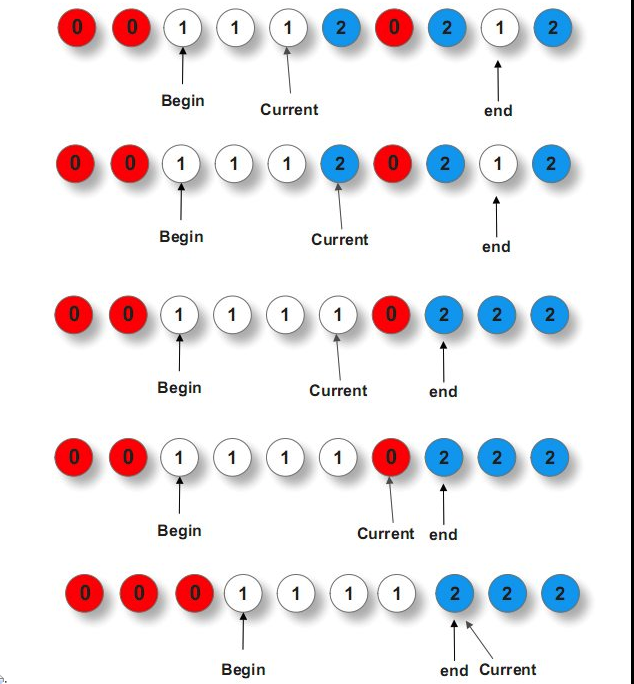

In [123]:
def Holland_Flag(li):
    
    cur, begin, end = 0, 0, len(li)-1
    
    while cur<=end:
        if li[cur] == 0:
            li[cur], li[begin] = li[begin], li[cur]
            begin+=1
            cur+=1
        if li[cur] == 1: cur+=1
        if li[cur] == 2: 
            li[cur], li[end] = li[end], li[cur]
            end-=1

    return li
    
print(Holland_Flag([0,0,1,1,1,1,2,0,2,1,2]))

[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]


# 8. 矩阵相乘

请编程实现矩阵乘法，并考虑当矩阵规模较大时的优化方法。

#### 解法1（暴力解法）

In [144]:
import numpy as np

def MulMatrix(m1, m2):
    
    m1_size, m2_size = np.shape(m1), np.shape(m2)
    if m1_size[1] != m2_size[0]: return None
    
    m3 = np.zeros((m1_size[0],m2_size[1]), dtype=int)
    
    for i in range(m1_size[0]):
        for j in range(m2_size[1]):
            m3[i,j] = 0
            for k in range(m1_size[1]):
                m3[i,j] += m1[i,k]*m2[k,j]
    
    
    return m3==np.dot(m1,m2)

# 2-D array: 2 x 3
two_dim_matrix_one = np.array([[1, 2, 3], [4, 5, 6]])
# 2-D array: 3 x 2
two_dim_matrix_two = np.array([[1, 2], [3, 4], [5, 6]])

print(MulMatrix(two_dim_matrix_one, two_dim_matrix_two)) 
print(np.shape(two_dim_matrix_one)[0])

[[ True  True]
 [ True  True]]
2


#### 解法二、Strassen算法

# 9. 完美洗牌 

有个长度为2n的数组{a1,a2,a3,...,an,b1,b2,b3,...,bn}，希望排序后{a1,b1,a2,b2,....,an,bn}，请考虑有无时间复杂度o(n)，空间复杂度0(1)的解法。

题目来源：此题是去年2013年UC的校招笔试题，看似简单，按照题目所要排序后的字符串蛮力变化即可，但若要完美的达到题目所要求的时空复杂度，则需要我们花费不小的精力。OK，请看下文详解，一步步优化。

#### 解法1：暴力解 O($n^2$)

步步前移

仔细观察变换前后两个序列的特点，我们可做如下一系列操作：

第①步、确定b1的位置，即让b1跟它前面的a2，a3，a4交换：

a1，b1，a2，a3，a4，b2，b3，b4

第②步、接着确定b2的位置，即让b2跟它前面的a3，a4交换：

a1，b1，a2，b2，a3，a4，b3，b4

第③步、b3跟它前面的a4交换位置：

a1，b1，a2，b2，a3，b3，a4，b4

b4已在最后的位置，不需要再交换。

如此，经过上述3个步骤后，得到我们最后想要的序列。但此方法的时间复杂度为O（N^2），我们得继续寻找其它方法，看看有无办法能达到题目所预期的O（N）的时间复杂度。

中间交换

当然，除了如上面所述的让b1，b2，b3，b4步步前移跟它们各自前面的元素进行交换外，我们还可以每次让序列中最中间的元素进行交换达到目的。

还是用上面的例子，针对a1，a2，a3，a4，b1，b2，b3，b4

第①步：交换最中间的两个元素a4，b1，序列变成（待交换的元素用粗体表示）：

a1，a2，a3，b1，a4，b2，b3，b4

第②步，让最中间的两对元素各自交换：

a1，a2，b1，a3，b2，a4，b3，b4

第③步，交换最中间的三对元素，序列变成：

a1，b1，a2，b2，a3，b3，a4，b4

同样，此法同解法1.1、步步前移一样，时间复杂度依然为O（N^2），我们得下点力气了。


#### 解法二： 完美洗牌法

# 寻找最大的第K个数

#### 快排

问题：内存溢出

In [3]:
class Solution:
    def findKthLargest(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: int
        """
        if len(nums)< 1: return None 
        l, r = [], []
        first = nums.pop(0)

        for i in nums:
            if i < first: l.append(i)
            else: r.append(i)

        if len(r) == k-1: return first
        elif len(r) > k-1: return self.findKthLargest(r, k)
        else: return self.findKthLargest(l, k - len(r) -1)


[1, 2, 3, 4, 5, 34, 54, 90]


#### 堆排序

In [ ]:
def MAX_Heapify(heap,HeapSize,root):#在堆中做结构调整使得父节点的值大于子节点
    
    left, right = 2*root+1, 2*root+2
    large = root
    
    if HeapSize > right and heap[right] > heap[root]:
        large = right 
        
    if HeapSize > left and heap[left] > heap[root]:
        large = left
        
    if large != root:
        heap[large], heap[root] = heap[root], heap[large]
        MAX_Heapify(heap, HeapSize, large)


#构造一个堆，将堆中所有数据重新排序
def Build_MAX_Heap(heap):



#将根节点取出与最后一位做对调，对前面len-1个节点继续进行对调整过程。
def HeapSort_max_k(heap, k):
    


if __name__ == '__main__':
    a = [30,50,57,77,62,78,94,80,84]
    print(a)
    HeapSort(a)
    print(a)